<a href="https://colab.research.google.com/github/su763/type/blob/main/coffee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     # For visualizations (plots, charts)
import seaborn as sns              # For advanced visualizations and aesthetics


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Coffe_sales.csv to Coffe_sales.csv


In [4]:
# Replace the filename with your actual file name
df = pd.read_csv('Coffe_sales.csv')

# Display first few rows
df.head()


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [6]:
df.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [7]:
df.tail()


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000
3546,18,card,35.76,Latte,Night,Sun,Mar,7,3,2025-03-23,18:11:38.635000


In [8]:
df.isnull().sum()

,0
hour_of_day,0
cash_type,0
money,0
coffee_name,0
Time_of_Day,0
Weekday,0
Month_name,0
Weekdaysort,0
Monthsort,0
Date,0


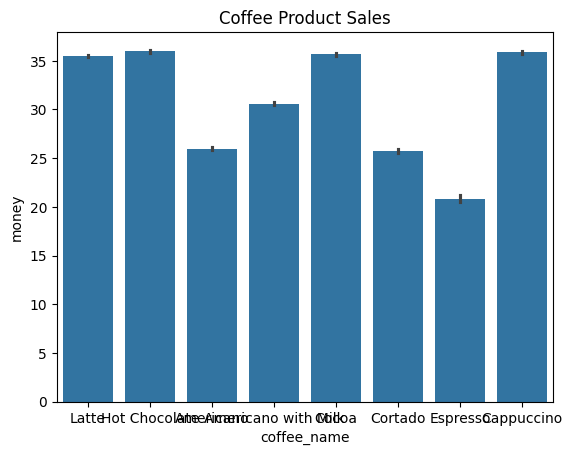

In [10]:
sns.barplot(x='coffee_name', y='money', data=df)
plt.title('Coffee Product Sales')
plt.show()

In [13]:
# Step 1️⃣ — Convert everything in the Date column to string first
df['Date'] = df['Date'].astype(str)

# Step 2️⃣ — Use pandas to_datetime with errors='coerce'
# This will automatically handle mixed types and invalid values as NaT (missing date)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

# Step 3️⃣ — Check results
print(df['Date'].dtypes)
print(df['Date'].head())


datetime64[ns]
0   2024-01-03
1   2024-01-03
2   2024-01-03
3   2024-01-03
4   2024-01-03
Name: Date, dtype: datetime64[ns]


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   hour_of_day  3547 non-null   int64         
 1   cash_type    3547 non-null   object        
 2   money        3547 non-null   float64       
 3   coffee_name  3547 non-null   object        
 4   Time_of_Day  3547 non-null   object        
 5   Weekday      3547 non-null   object        
 6   Month_name   3547 non-null   object        
 7   Weekdaysort  3547 non-null   int64         
 8   Monthsort    3547 non-null   int64         
 9   Date         1406 non-null   datetime64[ns]
 10  Time         3547 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 304.9+ KB


In [15]:
df = df.dropna(subset=['Date'])

# Extract date parts
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()   # e.g. January, February
df['Weekday'] = df['Date'].dt.day_name()   # e.g. Monday, Tuesday


/tmp/ipython-input-2042891882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
/tmp/ipython-input-2042891882.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month_name()   # e.g. January, February
/tmp/ipython-input-2042891882.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

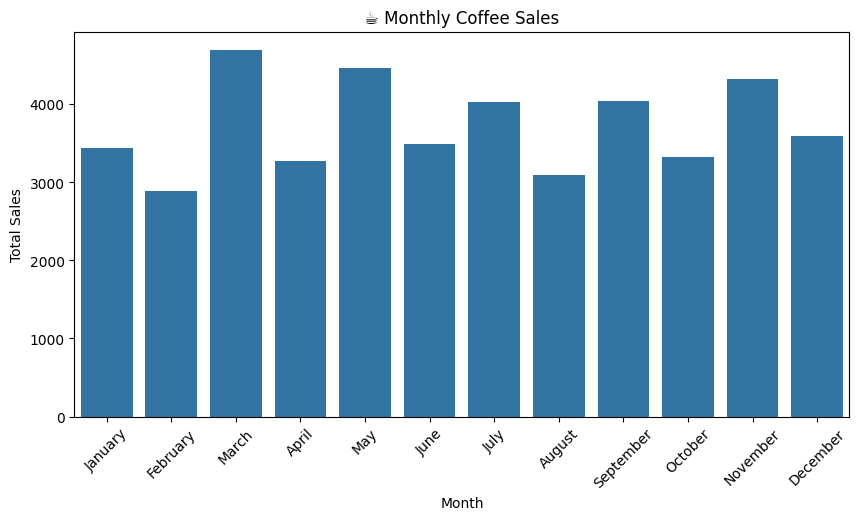

In [17]:
monthly_sales = df.groupby('Month')['money'].sum().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('☕ Monthly Coffee Sales')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()

/tmp/ipython-input-2162559541.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='coolwarm')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


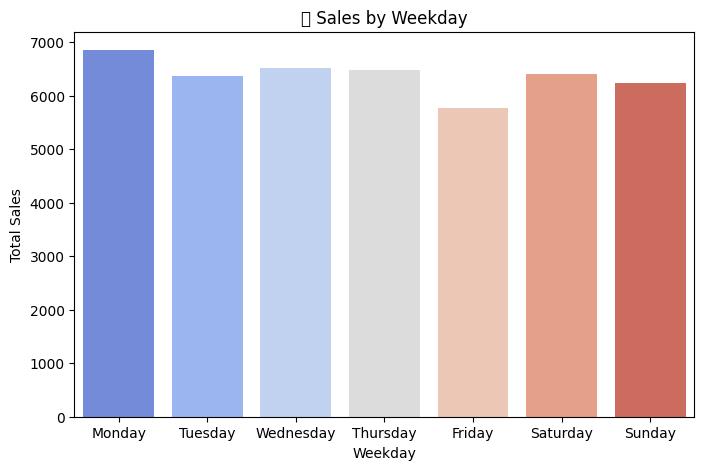

In [19]:
weekday_sales = df.groupby('Weekday')['money'].sum().reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
])

plt.figure(figsize=(8,5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='coolwarm')
plt.title('📆 Sales by Weekday')
plt.ylabel('Total Sales')
plt.show()

/tmp/ipython-input-1423191564.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coffee_name', y='money', data=df, estimator=sum, errorbar=None, palette='magma')


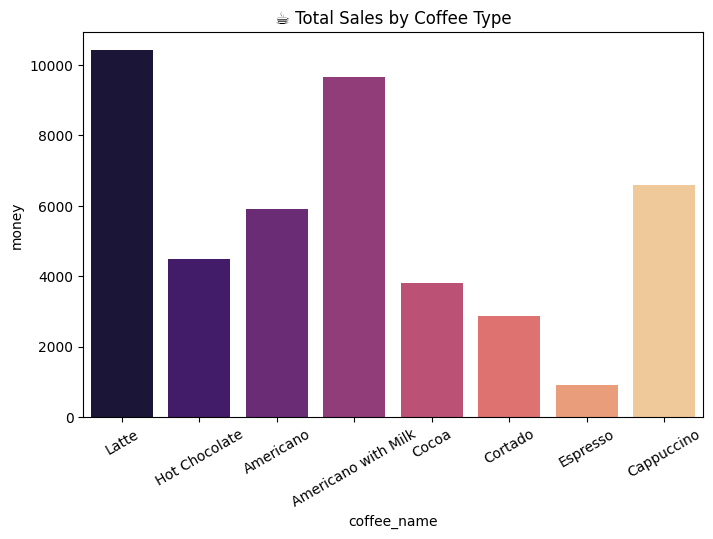

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x='coffee_name', y='money', data=df, estimator=sum, errorbar=None, palette='magma')
plt.title('☕ Total Sales by Coffee Type')
plt.xticks(rotation=30)
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


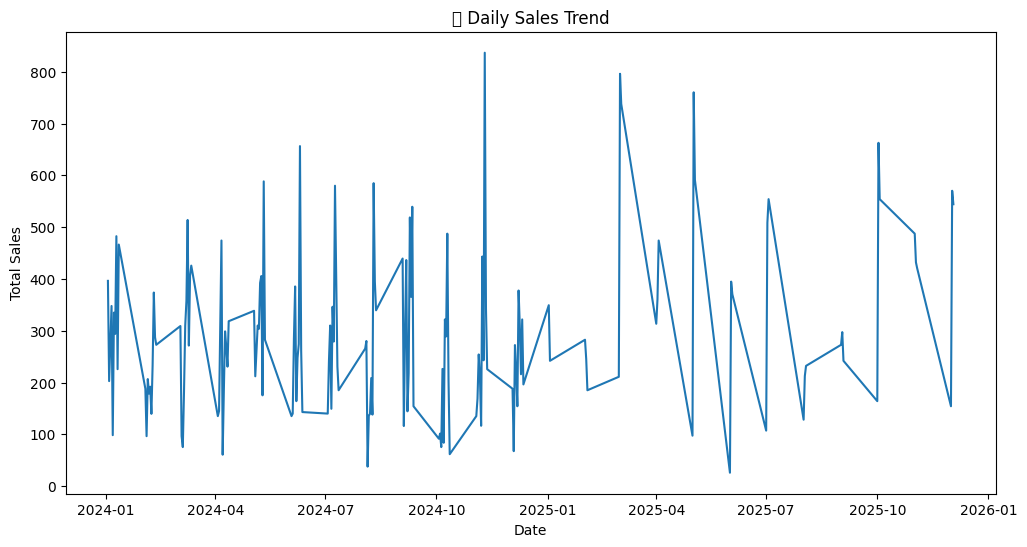

In [23]:
daily_sales = df.groupby('Date')['money'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='money', data=daily_sales)
plt.title('📅 Daily Sales Trend')
plt.ylabel('Total Sales')
plt.show()

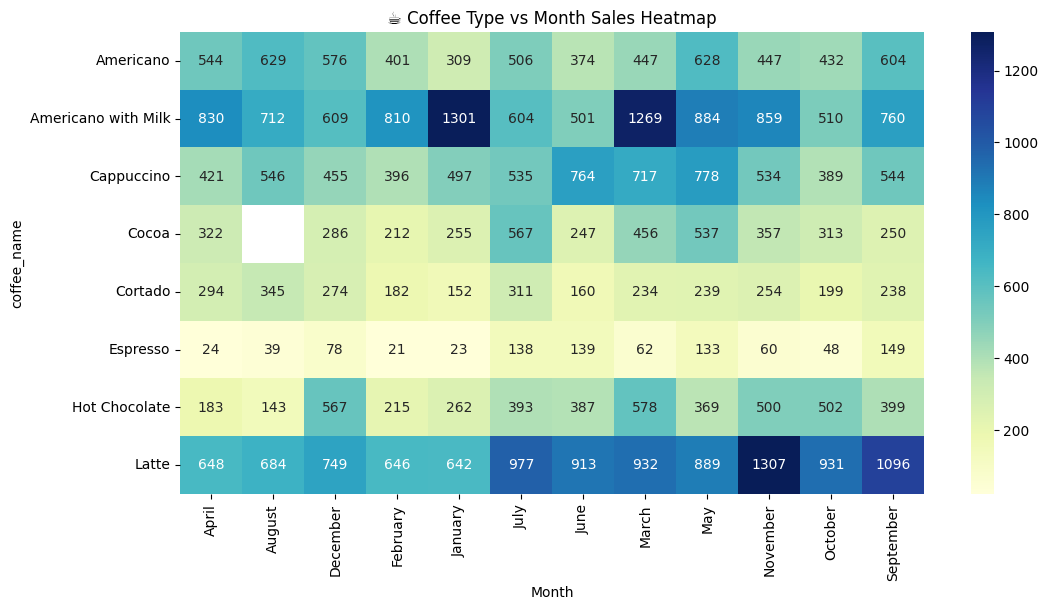

In [25]:
pivot = df.pivot_table(values='money', index='coffee_name', columns='Month', aggfunc='sum')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('☕ Coffee Type vs Month Sales Heatmap')
plt.show()